In [146]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
df = yf.download('.NS', period = 'max').reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-10,855.799988,899.500000,849.000000,877.250000,831.624573,27351793
1,2015-11-13,918.000000,1032.000000,917.000000,1004.099976,951.877136,8446622
2,2015-11-16,1011.000000,1040.000000,966.250000,988.950012,937.515137,3358159
3,2015-11-17,990.000000,1049.900024,976.200012,1036.900024,982.971252,3694092
4,2015-11-18,1017.250000,1068.800049,1015.299988,1045.650024,991.266235,3621593
...,...,...,...,...,...,...,...
1383,2021-06-24,1724.000000,1733.449951,1684.050049,1690.150024,1690.150024,653570
1384,2021-06-25,1695.000000,1732.449951,1692.000000,1728.199951,1728.199951,513349
1385,2021-06-28,1734.000000,1747.449951,1720.050049,1729.599976,1729.599976,290011
1386,2021-06-29,1731.849976,1752.949951,1722.000000,1729.250000,1729.250000,354016


In [176]:
# df.reset_index()
# df.stack().reset_index().rename(index=str).sort_values(['Date'])
df.Date = pd.to_datetime(df.Date)
df['Daily Changes'] = df['Adj Close'].pct_change()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Changes
1383,2021-06-24,1724.000000,1733.449951,1684.050049,1690.150024,1690.150024,653570,-0.010943
1384,2021-06-25,1695.000000,1732.449951,1692.000000,1728.199951,1728.199951,513349,0.022513
1385,2021-06-28,1734.000000,1747.449951,1720.050049,1729.599976,1729.599976,290011,0.000810
1386,2021-06-29,1731.849976,1752.949951,1722.000000,1729.250000,1729.250000,354016,-0.000202
1387,2021-06-30,1731.449951,1745.000000,1709.099976,1716.949951,1716.949951,281539,-0.007113


In [177]:
df['turn of month signal'] = np.where(df.Date.dt.month != df.Date.dt.month.shift(1), 1, 0)
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Daily Changes,turn of month signal
Date,,,,,,,,
2015-11-10,855.799988,899.500000,849.000000,877.250000,831.624573,27351793,NaN,1
2015-11-13,918.000000,1032.000000,917.000000,1004.099976,951.877136,8446622,0.144600,0
2015-11-16,1011.000000,1040.000000,966.250000,988.950012,937.515137,3358159,-0.015088,0
2015-11-17,990.000000,1049.900024,976.200012,1036.900024,982.971252,3694092,0.048486,0
2015-11-18,1017.250000,1068.800049,1015.299988,1045.650024,991.266235,3621593,0.008439,0
...,...,...,...,...,...,...,...,...
2021-06-24,1724.000000,1733.449951,1684.050049,1690.150024,1690.150024,653570,-0.010943,0
2021-06-25,1695.000000,1732.449951,1692.000000,1728.199951,1728.199951,513349,0.022513,0
2021-06-28,1734.000000,1747.449951,1720.050049,1729.599976,1729.599976,290011,0.000810,0


In [178]:
df['Strategy Returns'] = df['Daily Changes']*df['turn of month signal']
cumulative_strategy_returns = ((df['Strategy Returns'] + 1).cumprod())
total_strategy_returns = (cumulative_strategy_returns.iloc[-1]-1)*100
total_strategy_returns

-17.01359375841397

In [179]:
days = len(cumulative_strategy_returns)

cagr = (cumulative_strategy_returns.iloc[-1]**(252/days)-1)*100
cagr

-3.329222542904975

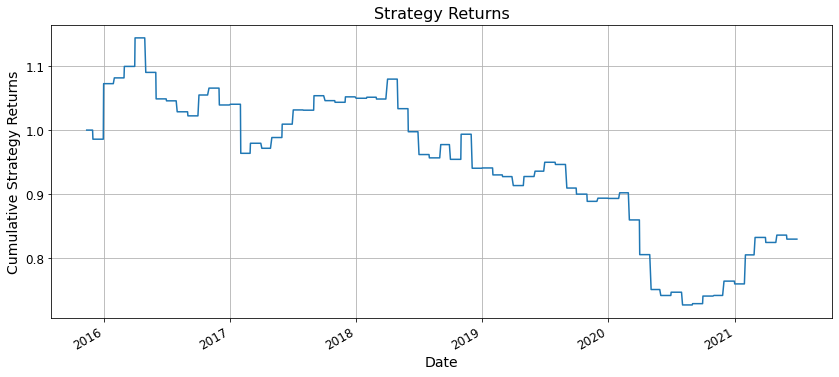

In [180]:
def plot_strategy_returns(cumulative_strategy_returns):
    plt.figure(figsize=(14,6))
    cumulative_strategy_returns.plot()
    plt.grid()

    # Define label for the title of the figure
    plt.title('Strategy Returns', fontsize=16)

    # Define labels for x-axis and y-axis
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Cumulative Strategy Returns', fontsize=14)

    # Define the tick size for x-axis and y-axis
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()


plot_strategy_returns(cumulative_strategy_returns)

In [181]:
def calc_drawdown(cum_rets):

    # Calculate the running maximum
    running_max = np.maximum.accumulate(cum_rets.dropna())

    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1

    # Calculate the percentage drawdown
    drawdown = (cum_rets)/running_max - 1
    return drawdown


drawdown = calc_drawdown(cumulative_strategy_returns)
max_dd = drawdown.min()*100

print("The maximum drawdown is %.2f" % max_dd)

The maximum drawdown is -36.43


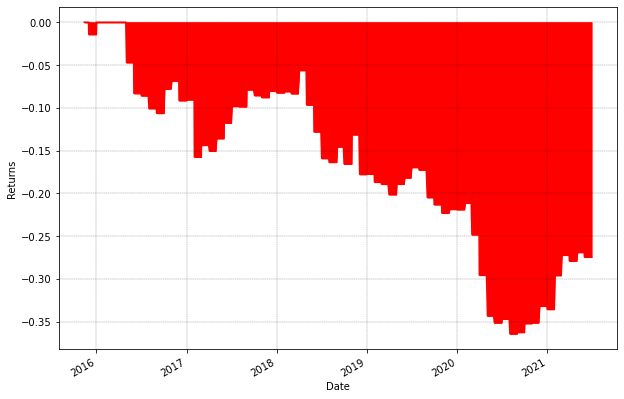

In [182]:
def plot_drawdown(drawdown):

    # Plot drawdown
    plt.figure(figsize=(10, 7))
    drawdown.plot(color='r')
    plt.ylabel('Returns')
    plt.fill_between(drawdown.index, drawdown.values, color='red')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
    plt.show()


plot_drawdown(drawdown)

In [183]:
# Calculate 200-day rolling mean of spy close prices
df['sma_200'] = df['Adj Close'].rolling(window=200).mean()

# Generate SMA signals
df['sma_signal'] = np.where(
    df['Adj Close'].shift(1) > df['sma_200'].shift(1), 1, 0)

df.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily Changes,turn of month signal,Strategy Returns,sma_200,sma_signal
Date,,,,,,,,,,,
2021-06-24,1724.000000,1733.449951,1684.050049,1690.150024,1690.150024,653570,-0.010943,0,-0.0,1584.038249,1
2021-06-25,1695.000000,1732.449951,1692.000000,1728.199951,1728.199951,513349,0.022513,0,0.0,1586.267748,1
2021-06-28,1734.000000,1747.449951,1720.050049,1729.599976,1729.599976,290011,0.000810,0,0.0,1588.629998,1
2021-06-29,1731.849976,1752.949951,1722.000000,1729.250000,1729.250000,354016,-0.000202,0,-0.0,1591.129498,1
2021-06-30,1731.449951,1745.000000,1709.099976,1716.949951,1716.949951,281539,-0.007113,0,-0.0,1593.455998,1


In [184]:
# Calculate strategy returns with trend factor
df['strategy_returns_trend_factor'] = df['Daily Changes'] * df['turn of month signal'] \
    * df['sma_signal']

# Calculate cumulative strategy returns with trend factor
cumulative_strategy_returns_trend_factor = (
    (df['strategy_returns_trend_factor']+1).cumprod())

# Calculate strategy returns with trend factor
total_strategy_returns_trend_factor = (
    cumulative_strategy_returns_trend_factor.iloc[-1]-1)*100

print("The strategy returns is %.2f" % total_strategy_returns_trend_factor)

The strategy returns is 15.23


In [185]:
# Total number of trading days
days = len(cumulative_strategy_returns_trend_factor)

# Calculate CAGR with trend factor
cagr_trend_factor = (
    cumulative_strategy_returns_trend_factor.iloc[-1]**(252/days)-1)*100

print('The CAGR from strategy is %.2f' % cagr_trend_factor)

The CAGR from strategy is 2.61


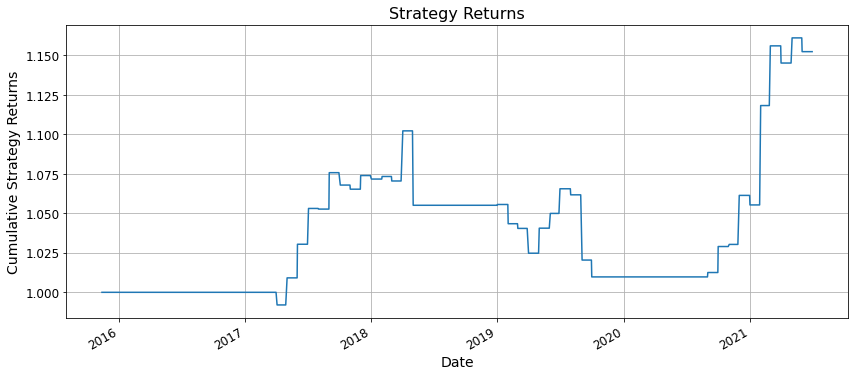

In [186]:
plot_strategy_returns(cumulative_strategy_returns_trend_factor) 

In [187]:
# Calculate drawdown with trend factors
drawdown = calc_drawdown(cumulative_strategy_returns_trend_factor)
max_dd_trend_factor = drawdown.min()*100

print("The maximum drawdown is %.2f" % max_dd_trend_factor)

The maximum drawdown is -8.39


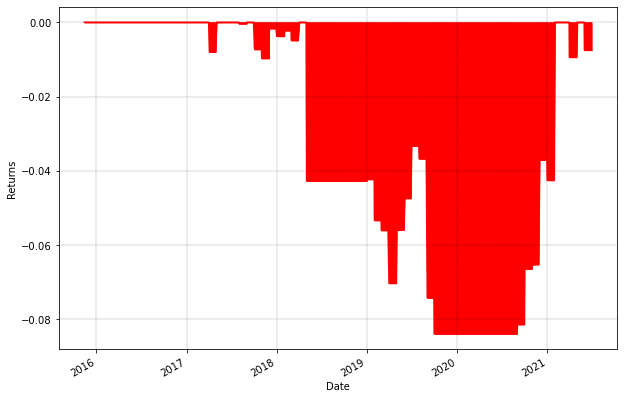

In [188]:
plot_drawdown(drawdown)

In [189]:
# Import tabulate
!pip install tabulate
from tabulate import tabulate

stats = tabulate(
        [
            ['Strategy Returns', total_strategy_returns, total_strategy_returns_trend_factor],
            ['CAGR', cagr, cagr_trend_factor],
            ['Maximum Drawdown', max_dd, max_dd_trend_factor],
            ['CAGR/Maximum Drawdown', cagr/abs(max_dd), cagr_trend_factor/abs(max_dd_trend_factor)],
        ],
        headers=['Stats Name','Strategy', 'Strategy with Trend Factor'], tablefmt='orgtbl')

print(stats)

| Stats Name            |    Strategy |   Strategy with Trend Factor |
|-----------------------+-------------+------------------------------|
| Strategy Returns      | -17.0136    |                    15.2344   |
| CAGR                  |  -3.32922   |                     2.60786  |
| Maximum Drawdown      | -36.4288    |                    -8.3878   |
| CAGR/Maximum Drawdown |  -0.0913899 |                     0.310911 |
